# 01-Import libraries

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 100000)

import numpy as np
import random as rnd
from sklearn.ensemble.gradient_boosting import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import ( Dense, Dropout,Input)
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

D:\Machine_learning\anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


# 02-Read DataSets

In [2]:
#Select the path of trainig and testing data
path=r'E:\1-GP\06-DeepLearning_part\00-Trainig_Testing_Data\Data Set'

In [4]:
#Get the name of features in training and testing data
features=pd.read_csv(path+'/NUSW-NB15_features.csv',engine='python')
features=features["Name"]

In [4]:
#print the name of feature 
print (features ) 

0                srcip
1                sport
2                dstip
3               dsport
4                proto
5                state
6                  dur
7               sbytes
8               dbytes
9                 sttl
10                dttl
11               sloss
12               dloss
13             service
14               Sload
15               Dload
16               Spkts
17               Dpkts
18                swin
19                dwin
20               stcpb
21               dtcpb
22             smeansz
23             dmeansz
24         trans_depth
25         res_bdy_len
26                Sjit
27                Djit
28               Stime
29               Ltime
30             Sintpkt
31             Dintpkt
32              tcprtt
33              synack
34              ackdat
35     is_sm_ips_ports
36        ct_state_ttl
37    ct_flw_http_mthd
38        is_ftp_login
39          ct_ftp_cmd
40          ct_srv_src
41          ct_srv_dst
42          ct_dst_ltm
43         

In [5]:
#Read datasets of 2500million record from 4 files 
data_train1=pd.read_csv(path+'/UNSW-NB15_1.csv',names=features)
data_train2=pd.read_csv(path+'/UNSW-NB15_2.csv',names=features)
data_train3=pd.read_csv(path+'/UNSW-NB15_3.csv',names=features)
data_train4=pd.read_csv(path+'/UNSW-NB15_4.csv',names=features)
#concatination for four files of data
data=pd.concat([data_train1,data_train2,data_train3,data_train4],ignore_index=True)


In [11]:
data=data.replace(r'^\s*$', np.nan, regex=True)

In [12]:
data.to_csv(path+r'\tot_data.csv')

# 03-Display Datasets

In [13]:
#display shape of data
data.shape 

(2540047, 49)

In [14]:
#dispaly partition of data 
print (data.head())
print(50*"*")
#display data types 
print (data.dtypes)
print (50*"*")

        srcip  sport          dstip dsport proto state       dur  sbytes  dbytes  sttl  dttl  sloss  dloss service         Sload         Dload  Spkts  Dpkts  swin  dwin  stcpb  dtcpb  smeansz  dmeansz  trans_depth  res_bdy_len     Sjit       Djit       Stime       Ltime  Sintpkt   Dintpkt  tcprtt  synack  ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm attack_cat  Label
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055     132     164    31    29      0      0     dns  500473.93750  621800.93750      2      2     0     0      0      0       66       82            0            0  0.00000   0.000000  1421927414  1421927414    0.017  0.013000     0.0     0.0     0.0                0             0               0.0           0.0          0           3           7           1            3                 1                 1               1     

In [15]:
#splitinf data to input and output data
y=data['Label']
x=data.drop(['Label','attack_cat'],axis=1)

In [28]:
del data

In [16]:
#print shape of x and y 
print ("the shape of X is : " ,x.shape )
print (50*"*")
print ("the shape of y is : " ,y.shape )

the shape of X is :  (2540047, 47)
**************************************************
the shape of y is :  (2540047,)


# 04-Spliting Datasets into trainig and testing data 

In [17]:
# function of spliting data into trainig and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
del x,y

In [18]:
#display the (trainig and testing data) 
print ("x_train : " , x_train.shape )
print (50*"*")
print ("y_train : " , y_train.shape )
print (50*"*")
print ("x_test : " , x_test.shape )
print (50*"*")
print ("y_test : " , y_test.shape )
print (50*"*")

x_train :  (2032037, 47)
**************************************************
y_train :  (2032037,)
**************************************************
x_test :  (508010, 47)
**************************************************
y_test :  (508010,)
**************************************************


# 05-remove null from features

In [19]:
#check if there is null data in features 
x_train.isnull().sum()

srcip                     0
sport                     0
dstip                     0
dsport                    0
proto                     0
state                     0
dur                       0
sbytes                    0
dbytes                    0
sttl                      0
dttl                      0
sloss                     0
dloss                     0
service                   0
Sload                     0
Dload                     0
Spkts                     0
Dpkts                     0
swin                      0
dwin                      0
stcpb                     0
dtcpb                     0
smeansz                   0
dmeansz                   0
trans_depth               0
res_bdy_len               0
Sjit                      0
Djit                      0
Stime                     0
Ltime                     0
Sintpkt                   0
Dintpkt                   0
tcprtt                    0
synack                    0
ackdat                    0
is_sm_ips_ports     

In [19]:
#columns which contain null data 
#1-ct_flw_http_mthd
#2-is_ftp_login 



In [21]:
#repeat the last steps with the other two features 
x_train["ct_flw_http_mthd"].fillna("unknown", inplace = True)
x_test["ct_flw_http_mthd"].fillna("unknown", inplace = True)
#then check if there is a null again in this feature 
x_train.ct_flw_http_mthd.isnull().sum()

0

In [22]:
#repeat the last steps for the last feature 
x_train["is_ftp_login"].fillna("unknown", inplace = True)
x_test["is_ftp_login"].fillna("unknown", inplace = True)
#then check if there is a null again in this feature 
x_train.is_ftp_login.isnull().sum()

0

In [26]:
#last check for the data (again check for null )
x_train.isnull().sum()
x_test.isnull().sum()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbytes              0
dbytes              0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_spo

# 06-Replacing white spaces with zero number

In [29]:
#removing white spaces from each columns
x_train = x_train.replace(" ", 0).bfill()
x_test  =  x_test.replace(" ", 0).bfill()


# 07-Convert categories into numeric data 

In [23]:
#check which columns have object data type 
print ("x_train datatype is :\n" , x_train.dtypes)
print (50*"*")
print ("x_test  datatype is :\n" , x_test.dtypes )
print (50*"*")

x_train datatype is :
 srcip                object
sport                object
dstip                object
dsport               object
proto                object
state                object
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service              object
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float

In [24]:
#columns which have object data types 
#1-srcip
#2-sport
#3-dstip
#4-dsport
#5-proto
#6-state
#7-service
#8-ct_flw_http_mthd
#9-is_ftp_login
#10-ct_ftp_cmd
#11-attack_cat
#12-

#Approach #2 - Label Encoding

num=x_train._get_numeric_data().columns #numeric data columns names
col_object_dtype=set(x_train.columns)-set(num) #categorical data columns names

for col in col_object_dtype:
    x_train[col] = x_train[col].astype('category')
    
    x_train[col] = x_train[col].cat.codes
    
for col in col_object_dtype:
    x_test[col] = x_test[col].astype('category')
    
    x_test[col] = x_test[col].cat.codes

In [25]:
#check if there is object data type 

print ("x_train datatype is :\n" , x_train.dtypes)
print (50*"*")
print ("x_test  datatype is :\n" , x_test.dtypes )
print (50*"*")

x_train datatype is :
 srcip                  int8
sport                 int32
dstip                  int8
dsport                int32
proto                 int16
state                  int8
dur                 float64
sbytes                int64
dbytes                int64
sttl                  int64
dttl                  int64
sloss                 int64
dloss                 int64
service                int8
Sload               float64
Dload               float64
Spkts                 int64
Dpkts                 int64
swin                  int64
dwin                  int64
stcpb                 int64
dtcpb                 int64
smeansz               int64
dmeansz               int64
trans_depth           int64
res_bdy_len           int64
Sjit                float64
Djit                float64
Stime                 int64
Ltime                 int64
Sintpkt             float64
Dintpkt             float64
tcprtt              float64
synack              float64
ackdat              float

In [26]:
#check num of columns and the shape of data
print ("x_train : " , x_train.shape )
print (50*"*")
print ("y_train : " , y_train.shape )
print (50*"*")
print ("x_test : " , x_test.shape )
print (50*"*")
print ("y_test : " , y_test.shape )
print (50*"*")

x_train :  (2032037, 47)
**************************************************
y_train :  (2032037,)
**************************************************
x_test :  (508010, 47)
**************************************************
y_test :  (508010,)
**************************************************


# 08-Standard Scaler 

In [27]:
#scaling the data
num=x_train._get_numeric_data().columns #numeric data columns names

x_train[num].agg(['max','min','std','mean']) 
x_test[num].agg(['max','min','std','mean']) 

#select object from class
SS=StandardScaler(copy=True, with_mean=True, with_std=True)
SS.fit(x_train[num])
x_train.at[:,num]=SS.transform(x_train[num])
x_test.at[:,num]=SS.transform(x_test[num])


In [30]:
#display the data after scaling 
print ("x_train :",x_train.head())
print(50*"*")
#display data types 
print ("x_test  :",x_test.head())
print (50*"*")

x_train :             srcip     sport     dstip    dsport     proto     state       dur    sbytes    dbytes      sttl      dttl     sloss     dloss   service     Sload     Dload     Spkts     Dpkts      swin      dwin     stcpb     dtcpb   smeansz   dmeansz  trans_depth  res_bdy_len      Sjit      Djit     Stime     Ltime   Sintpkt   Dintpkt     tcprtt     synack    ackdat  is_sm_ips_ports  ct_state_ttl  ct_flw_http_mthd  is_ftp_login  ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm
1529494 -2.151892  0.722149  1.561927  0.894878  0.473466  1.017750 -0.051259 -0.071213 -0.226772 -0.037231 -0.718364 -0.226045 -0.289536  0.091857  4.152554 -0.580296 -0.408404 -0.352801 -1.196644 -1.193295 -0.887540 -0.887432  0.051196 -0.824841    -0.240308    -0.089578 -0.093506 -0.209039  0.857704  0.857703 -0.069556 -0.054963  -0.134283  -0.128068 -0.120738         -0.04077     -0.382260          0.938324      0.879196   -0.476465    3.30

# 09-Correlation

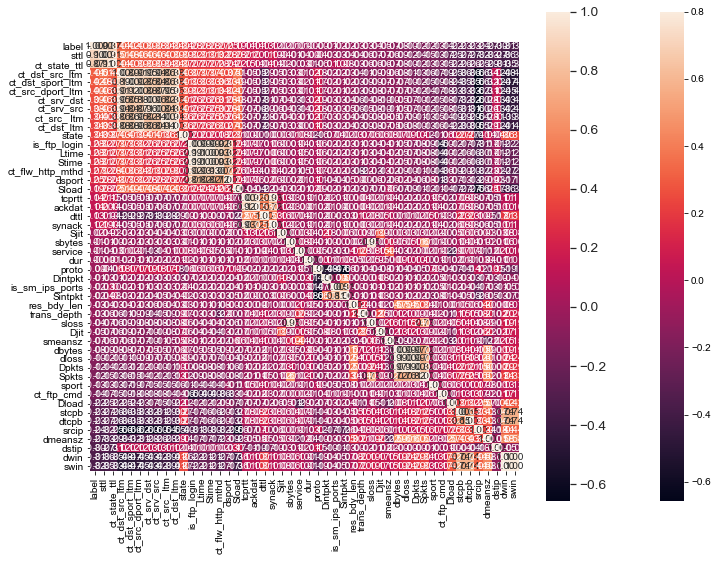

In [31]:
#correlation matrix
data_train=x_train
data_train['label']=y_train
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(corrmat, vmax=.8, square=True);


#attacks features correlation matrix
k = 49 #number of variables for heatmap
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(data_train
[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


# 10-sorting features of training data and testing data

In [32]:
#sort the data alphabetically
x_train = x_train.reindex(sorted(x_train.columns), axis=1)  
#sort the data alphabetically 
x_test = x_test.reindex(sorted(x_test.columns), axis=1) 

# 11-Hidden layers in deeplearning neural network 

In [33]:
import tensorflow as tf

best_acc=0
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        global best_acc    
        #if(logs.get('loss')<0.4):

        if(logs.get( 'val_accuracy')>best_acc):
            best_acc=logs.get( 'val_accuracy')
            self.model.save('cp.ckpt')
            print(f"model_saved at epoch:{epoch} with accuracy:{best_acc}")
            #self.model.stop_training = True
callbacks = myCallback()




In [34]:
x_train=x_train.drop('label',axis=1)

In [35]:


input_layer= Input(shape=(x_train.shape[1]))
x=Dense(32,'relu')(input_layer)
x=Dropout(0.5)(x)
x=Dense(16,'relu')(x)
x=Dropout(0.3)(x)

x=Dense(2,'relu')(x)


#tivation =  softmax  , elu , relu , tanh , sigmoid , linear

model = Model(inputs=input_layer, outputs=x)
model.compile(optimizer ='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'])
hist=model.fit(np.array(x_train), np.array(y_train), epochs=1,
          validation_data=(np.array(x_test), np.array(y_test)))
          #callbacks=[callbacks]
          


63502/63502 [==============================] - 158s 2ms/step - loss: 0.0788 - accuracy: 0.9104 - val_loss: 0.0533 - val_accuracy: 0.8730
